[[1.         0.14070848]
 [0.14070848 1.        ]]


<AxesSubplot:>

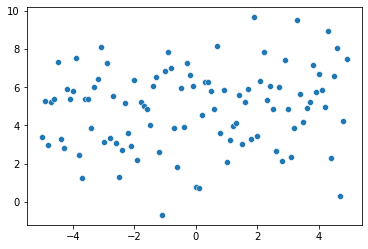

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

xs=np.arange(-5,5,0.1)
ys=np.random.normal(5,2,100) #xs *2+6

print(np.corrcoef(xs,ys))

sns.scatterplot(x=xs,y=ys)

[[ 1.         -0.03870855]
 [-0.03870855  1.        ]]


<AxesSubplot:>

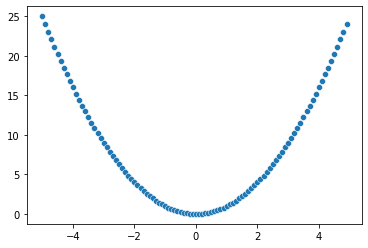

In [3]:
xs=np.arange(-5,5,0.1)
ys=xs **2

print(np.corrcoef(xs,ys))

sns.scatterplot(x=xs,y=ys)

# PCA

In [ ]:
#anomisierte daten

In [4]:
df=pd.read_csv("../data/Diabetes/diabetes.csv")

In [5]:
from sklearn.decomposition import PCA

In [7]:
pca=PCA()
X=df[["Pregnancies","Glucose","BloodPressure","Age","BMI"]]

pca.fit(X)

pca.transform(X)

array([[-29.06821159,  -0.93935624,  13.51489406,  -1.53793362,
         -0.56511755],
       [ 36.27640569,  -2.23542237,   1.60012791,   3.21504047,
         -2.52695069],
       [-59.46968333,  16.70341165,  -3.71826008,  11.31563323,
          4.47248852],
       ...,
       [  0.17770465,  -1.69668023,  -2.62784602,   6.41638348,
          1.67176095],
       [ -5.06381896,   7.8109508 ,  14.05620387,  -0.49913034,
         -5.04832313],
       [ 28.52869276,  -3.86016227,  -7.90524226,   1.3059399 ,
         -1.19412006]])

In [10]:
print(pca.explained_variance_) 

[1052.19112991  371.43175951  123.74337396   53.56386523    7.78254304]


In [ ]:
##wie viel Varianz erklärt welche Spalte highest--lowest

In [11]:
print(pca.explained_variance_/np.sum(pca.explained_variance_))  #normiert

[0.65405784 0.23088757 0.07692074 0.0332961  0.00483775]


In [ ]:
#[0.65405784 0.23088757 0.07692074 0.0332961  0.00483775]
#wir können sehen das 88%der Streueung durch die zwei ersten Spalten erklärt werden kann

<AxesSubplot:>

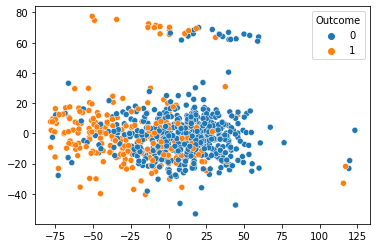

In [13]:
pca=PCA(n_components=2) #<----------- spalten reduzieren
X=df[["Pregnancies","Glucose","BloodPressure","Age","BMI"]]

pca.fit(X)

X_transformed= pca.transform(X)
sns.scatterplot(x=X_transformed[:,0], y=X_transformed[:,1], hue=df["Outcome"])

In [ ]:
#daten herunterbrechen, oder anzahl der spalten reduzieren oder anomisierung der daten

In [14]:
## Die PCA sollte auf basis von train daten passieren! 

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X=df[["Pregnancies","Glucose","BloodPressure","Age","BMI"]]
y=df["Outcome"]

X_train, X_test, y_train, y_test=train_test_split(X,y)

pca=PCA(n_components=2)
pca.fit(X)

X_train_transformed=pca.transform(X_train)

model=LogisticRegression()
model.fit(X_train_transformed,y_train) # das model wird nur mit zwei dimensionen gefüttert anstat von 5

X_test_transformed=pca.transform(X_test)
print(model.score(X_test_transformed, y_test))

0.765625


In [23]:
X_pred=pd.DataFrame([[5,100,80,30,33]], columns=["Pregnancies","Glucose","BloodPressure","Age","BMI"])
X_pred

,Pregnancies,Glucose,BloodPressure,Age,BMI
0,5,100,80,30,33


In [24]:
model.predict(pca.transform(X_pred)) #needs tp go through pca first otherwise it would be expecting two columns, not 5!!!

array([0])